<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/CostFunction_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Optional Lab: Logistic Regression — **Cost Function & Logistic Loss**

In this ungraded lab, you will:
- Examine why the **squared error** loss is not ideal for logistic regression
- Implement the **logistic loss** for a single example
- Build the **average logistic cost** J(w,b) over a dataset
- Visualize surfaces of the cost vs parameters w, b
- Confirm the code is executable end‑to‑end with simple toy data

> Notation used in the lab follows Andrew Ng's ML course convention.


In [ ]:

# ======================
# 1) Imports & Plot Style
# ======================
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 - needed for 3D plotting

# Matplotlib defaults similar to the course notebooks
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True



## Toy dataset

We will use a 1‑D feature x and a binary label y in {0,1} similar to the course examples.


In [ ]:

# ========================
# 2) A simple training set
# ========================
# Feature values 0..5 and a threshold-like label split
x_train = np.array([0, 1, 2, 3, 4, 5], dtype=float)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=float)

m = x_train.shape[0]  # number of training examples
print(f"m = {m}, x shape = {x_train.shape}, y shape = {y_train.shape}")


m = 6, x shape = (6,), y shape = (6,)



## Sigmoid and model f_w,b(x)

The logistic model outputs a probability via the sigmoid:

$$
g(z) = \frac{1}{1 + e^{-z}}, \quad
f_{w,b}(x) = g(w^\top x + b)
$$



In [ ]:

# ==============================
# 3) Sigmoid and model prediction
# ==============================
def sigmoid(z):
    """Numerically-stable sigmoid."""
    # Clip to avoid overflow in exp for large |z|
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def f_wb(x, w, b):
    """Model prediction for a scalar feature x (or vectorized x)."""
    return sigmoid(w * x + b)

# quick sanity check
print("sigmoid(0) =", sigmoid(0.0))


sigmoid(0) = 0.5


## Loss Functions

### (A) Squared error (for contrast)
Using squared error with a sigmoid model can produce a **non-convex** cost surface in \((w,b)\),  
which may hinder gradient descent.

### (B) Logistic loss (preferred for classification)
For a single example \((x^{(i)}, y^{(i)})\) and model output \(f = f_{w,b}(x^{(i)})\):

- If \(y = 1\):  
  $$
  \text{loss} = -\log(f)
  $$

- If \(y = 0\):  
  $$
  \text{loss} = -\log(1-f)
  $$

A compact form is:  

$$
\text{loss}(f,y) = -\big( y \log(f) + (1-y)\log(1-f) \big)
$$


In [ ]:

# ==========================================
# 4) Loss for one example and dataset costs
# ==========================================
def squared_error(f, y):
    """Squared error for a single example (for contrast)."""
    return 0.5 * (f - y)**2

def logistic_loss(f, y, eps=1e-12):
    """Logistic loss for a single example (numerically safe)."""
    # Clip f to (eps, 1-eps) to avoid log(0)
    f = np.clip(f, eps, 1 - eps)
    return -(y * np.log(f) + (1 - y) * np.log(1 - f))

def squared_error_cost(x, y, w, b):
    """Average squared error cost over the dataset using a logistic model."""
    f = f_wb(x, w, b)
    return np.mean(squared_error(f, y))

def logistic_cost(x, y, w, b):
    """Average logistic cost J(w,b) over the dataset."""
    f = f_wb(x, w, b)
    return np.mean(logistic_loss(f, y))



## Visualizing the two logistic loss curves

The logistic loss is piecewise—one curve for y=1 and one for y=0—both defined on f in (0,1).


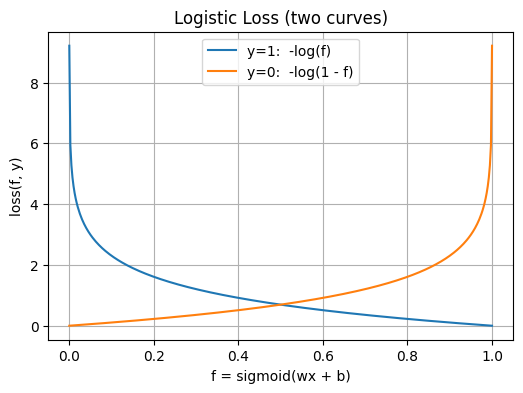

In [ ]:

# ====================================
# 5) Plot the two logistic loss curves
# ====================================
def plot_two_logistic_loss_curves():
    f = np.linspace(1e-4, 1-1e-4, 400)
    loss_y1 = -np.log(f)           # y = 1
    loss_y0 = -np.log(1 - f)       # y = 0

    plt.figure()
    plt.plot(f, loss_y1, label="y=1:  -log(f)")
    plt.plot(f, loss_y0, label="y=0:  -log(1 - f)")
    plt.xlabel("f = sigmoid(wx + b)")
    plt.ylabel("loss(f, y)")
    plt.title("Logistic Loss (two curves)")
    plt.legend()
    plt.show()

plot_two_logistic_loss_curves()



## Cost surfaces vs parameters (w,b)

We now visualize:
1. Squared error cost when used with a sigmoid model (for contrast)  
2. Logistic cost J(w,b) (the right choice for logistic regression)


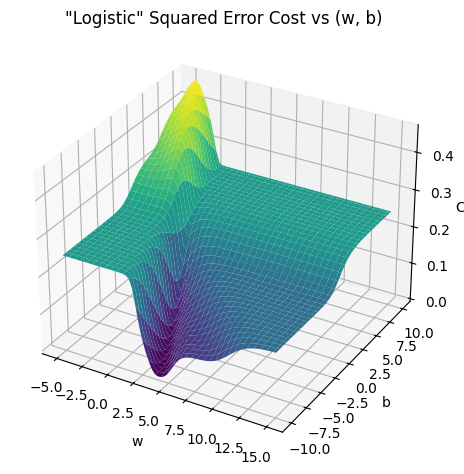

In [ ]:

# =============================================
# 6) 3D surface plots for cost vs (w, b) params
# =============================================
def surface(cost_fn, x, y, w_range, b_range, n=80):
    """Compute a grid of cost values over w,b ranges."""
    w_vals = np.linspace(w_range[0], w_range[1], n)
    b_vals = np.linspace(b_range[0], b_range[1], n)
    W, B = np.meshgrid(w_vals, b_vals)
    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i, j] = cost_fn(x, y, W[i, j], B[i, j])
    return W, B, Z

def plot_surface(W, B, Z, title="Cost surface", zlabel="Cost"):
    fig = plt.figure(figsize=(6, 4.8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, Z, linewidth=0, antialiased=True, cmap="viridis")
    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# ---- Squared error with logistic model (for contrast) ----
W, B, Z = surface(squared_error_cost, x_train, y_train, w_range=(-5, 15), b_range=(-10, 10), n=70)
plot_surface(W, B, Z, title='"Logistic" Squared Error Cost vs (w, b)', zlabel="Cost")


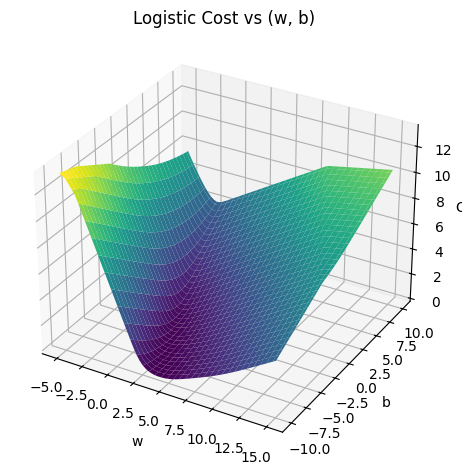

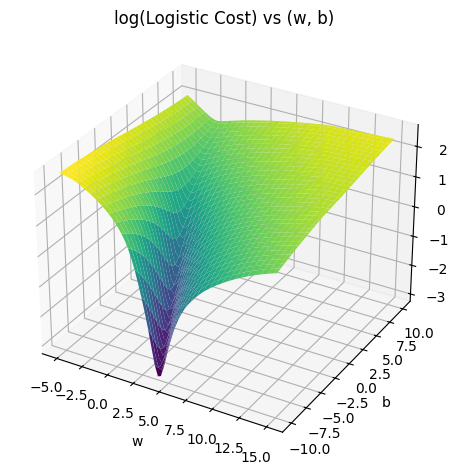

In [ ]:

# ---- Logistic cost (preferred) ----
W2, B2, Z2 = surface(logistic_cost, x_train, y_train, w_range=(-5, 15), b_range=(-10, 10), n=70)
plot_surface(W2, B2, Z2, title="Logistic Cost vs (w, b)", zlabel="Cost")

# Optional: visualize log of the cost to accentuate the valley shape
Z2_log = np.log(np.clip(Z2, 1e-12, None))
plot_surface(W2, B2, Z2_log, title="log(Logistic Cost) vs (w, b)", zlabel="log(Cost)")



## Why logistic loss?
- With the sigmoid link, squared error can lead to non‑convex landscapes in (w,b) → gradient descent may struggle.
- Logistic loss yields a smooth surface suitable for optimization; for linear logistic regression it is convex in (w,b).
- The average cost is:
  J(w,b) = (1/m) * sum_i loss( f_w,b(x^(i)), y^(i) ),
  where loss(f,y) = -[ y*log(f) + (1-y)*log(1-f) ].
- In practice you would use gradient descent (or variants) on J(w,b) to learn parameters.



## Quick executable check

The cell below computes J(w,b) on the toy dataset for a few candidate parameters to verify code paths.


In [ ]:

# ==========================
# 7) Quick executable checks
# ==========================
candidates = [(0.0, 0.0), (2.0, -4.0), (4.0, -8.0), (6.0, -12.0)]
for w, b in candidates:
    print(f"(w={w:>4.1f}, b={b:>5.1f})  squared_error_cost = {squared_error_cost(x_train, y_train, w, b):.5f}"
          f" | logistic_cost = {logistic_cost(x_train, y_train, w, b):.5f}")


(w= 0.0, b=  0.0)  squared_error_cost = 0.12500 | logistic_cost = 0.69315
(w= 2.0, b= -4.0)  squared_error_cost = 0.02326 | logistic_cost = 0.16430
(w= 4.0, b= -8.0)  squared_error_cost = 0.02089 | logistic_cost = 0.12169
(w= 6.0, b=-12.0)  squared_error_cost = 0.02083 | logistic_cost = 0.11635
